# Skewed Distributions

Try out several skewed distributions with different skew and kurtosis properties.

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.stats import norm, nct, skewnorm

mpl.rc('font', size=16)

## Skew Normal Distribution

$$
f(x,\mu,\sigma,\xi) = 2\phi(z)\Phi(\xi z),
$$

where $z=(x-\mu)/\sigma$, $\phi$ is the standard normal distribution, and $\Phi$ is the standard normal CDF.

In the expression, $x,\mu,\xi\in\mathbb{R}$ and $\sigma>0$.

In [8]:
skewnorm(0.5, 0., loc=0., scale=1.)

TypeError: _parse_args() got multiple values for argument 'loc'

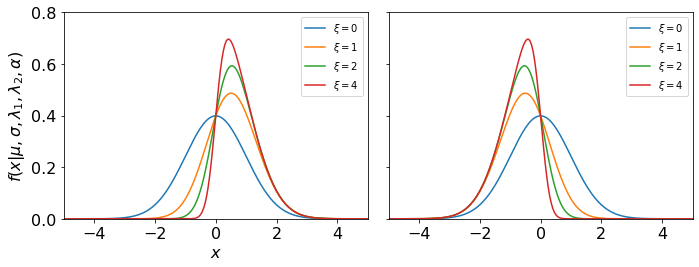

In [23]:
x = np.linspace(-5,5, 201)

fig, axes = plt.subplots(1,2, figsize=(10,4), sharex=True, sharey=True, tight_layout=True)
for xi in [0.,1.,2.,4.]:
    axes[0].plot(x, skewnorm.pdf(x, a=+xi, loc=0., scale=1.), label=r'$\xi={:g}$'.format(xi))
    axes[1].plot(x, skewnorm.pdf(x, a=-xi, loc=0., scale=1.), label=r'$\xi={:g}$'.format(xi))

#     axes[1].plot(x, esgn(x, alpha=-1.,lambda1=l1, lambda2=10., mu=0.,sigma=1.),
#             label=r'$\lambda_1={:g}$, $\lambda_2=10$'.format(l1))
    
axes[0].set(xlim=(-5,5), xlabel='$x$',
            ylim=(0,0.8), 
            ylabel=r'$f(x|\mu,\sigma,\lambda_1,\lambda_2,\alpha)$')

axes[0].legend(fontsize=10);
axes[1].legend(fontsize=10);

## Extended Skew Generalized Normal Distribution

$$
f(x|\mu,\sigma,\lambda_1,\lambda_2,\alpha) = \frac{2}{\alpha+2}\phi(z)\left[1+\alpha\Phi\left(\frac{\lambda_1z}{\sqrt{1+\lambda_2 z^2}}\right)\right]
$$

where $z=(x-\mu)/\sigma$ and $x\in\mathbb{R}$, $\mu\in\mathbb{R}$, $\sigma>0$.

The shape parameters are $\lambda_1\in\mathbb{R}$, $\lambda_2\geq0$, $\alpha\geq-1$.

See C. Satheesh Kumar & M. R. Anusree, *On an Extended Version of Skew Generalized Normal Distribution and Some of its Properties*, [Communications in Statistics - Theory and Methods, **44**:3, 573-586, 2015](https://doi.org/10.1080/03610926.2012.739251).

In [2]:
def esgn(x, alpha, lambda1, lambda2, mu=0., sigma=1.):
    # Range checks:
    if sigma <= 0:
        raise ValueError('sigma must be strictly positive.')
    if lambda2 < 0:
        raise ValueError('lambda2 must be nonnegative.')
    if alpha < -1.:
        raise ValueError('alpha must be >= -1.')

    z = (x - mu)/sigma
    return 2/(alpha+2)*norm.pdf(z) * (1+alpha*norm.cdf((lambda1*z)/np.sqrt(1+lambda2*z**2)))

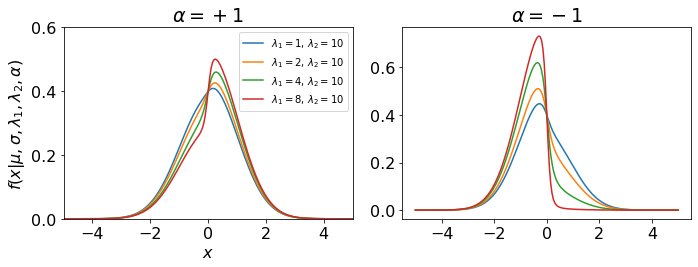

In [8]:
x = np.linspace(-5,5, 201)

fig, axes = plt.subplots(1,2, figsize=(10,4), tight_layout=True)
for l1 in [1.,2.,4.,8.]:
    axes[0].plot(x, esgn(x, alpha=1.,lambda1=l1, lambda2=10., mu=0.,sigma=1.),
            label=r'$\lambda_1={:g}$, $\lambda_2=10$'.format(l1))
    axes[1].plot(x, esgn(x, alpha=-1.,lambda1=l1, lambda2=10., mu=0.,sigma=1.),
            label=r'$\lambda_1={:g}$, $\lambda_2=10$'.format(l1))
    
axes[0].set(xlim=(-5,5), xlabel='$x$',
            ylim=(0,0.6), 
            ylabel=r'$f(x|\mu,\sigma,\lambda_1,\lambda_2,\alpha)$',
            title=r'$\alpha=+1$')

axes[1].set(title=r'$\alpha=-1$')

axes[0].legend(fontsize=10);

## Non-Central $t$ Distribution

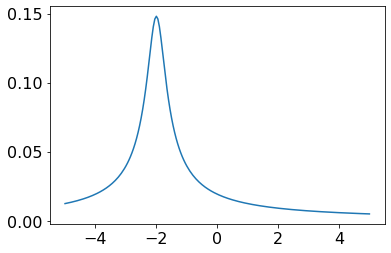

In [4]:
plt.plot(x, nct.pdf(x, df=0.1, nc=0, loc=-2, scale=1.))

## Combined Exponential-Normal{Generalized Wiebull} Distribution

$$
f(x;\mu,\sigma,\xi) = \frac{\phi\left(\frac{x-\mu}{\sigma}\right)}{|\sigma|\left(\bar{\Phi}\left(\frac{x-\mu}{\sigma}\right)\right)^{\xi+1}}\ \exp{\left(-\frac{\left(\bar{\Phi}\left(\frac{x-\mu}{\sigma}\right)\right)^{-\xi}-1}{\xi}\right)},
$$

where

$$
x\in\mathbb{R},\ \mu\in\mathbb{R},\ \sigma\neq0,\ \xi>0
$$

and $\phi$ is the standard normal distribution and $\bar{\Phi}$ the standard normal survival function.

For details, including maximum likelihood estimators, see Mohammad A. Aljarrah, Felix Famoye & Carl Lee, *A new generalized normal distribution: Properties and applications*, [Communications in Statistics - Theory and Methods, **48**:18, 4474-4491, 2019](https://doi.org/10.1080/03610926.2018.1483509).

In [5]:
def cengw(x, mu=0., sigma=1., xi=1e-10):
    if sigma == 0.:
        raise ValueError('sigma cannot be zero.')
    if xi <= 0.:
        raise ValueError('xi must be strictly positive.')

    z = (x - mu)/sigma
    return norm.pdf(z) / (np.abs(sigma) * norm.sf(z)**(xi+1)) * np.exp(-(norm.sf(z)**(-xi) - 1.)/xi)

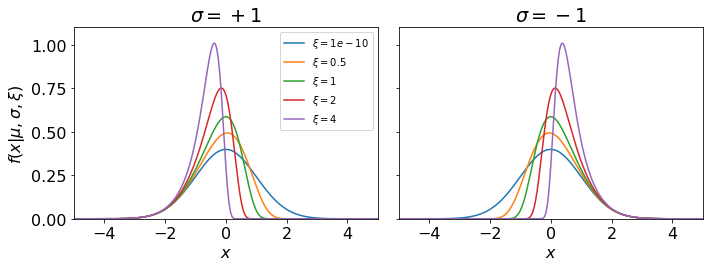

In [6]:
fig, axes = plt.subplots(1,2, figsize=(10,4), sharex=True, sharey=True, tight_layout=True)

for xi in [1e-10, 0.5, 1., 2., 4.]:
    axes[0].plot(x, cengw(x, mu=0., sigma=1., xi=xi), label=r'$\xi={:g}$'.format(xi))
    axes[1].plot(x, cengw(x, mu=0., sigma=-1., xi=xi), label=r'$\xi={:g}$'.format(xi))

axes[0].legend(fontsize=10);
axes[0].set(xlabel='$x$', ylabel=r'$f(x|\mu,\sigma,\xi)$', title=r'$\sigma=+1$')
axes[1].set(xlabel='$x$', xlim=(-5,5), ylim=(0,1.1), title=r'$\sigma=-1$');